In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Define prior: Beta(α, β) with α = 2, β = 2
alpha_prior = 2
beta_prior = 2

# Define likelihood: Geometric likelihood
observed_success_at = 5  # The client answered on the 5th call

with pm.Model():
    # Prior
    p = pm.Beta("p", alpha_prior, beta_prior)

    # Likelihood: Geometric distribution
    likelihood = pm.Geometric("obs", p=p, observed=observed_success_at)


WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with pm.Model():
    # Prior
    p = pm.Beta("p", alpha_prior, beta_prior)

    # Likelihood: Geometric distribution
    likelihood = pm.Geometric("obs", p=p, observed=observed_success_at)

    # Posterior sampling
    trace = pm.sample(5000, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 15 seconds.


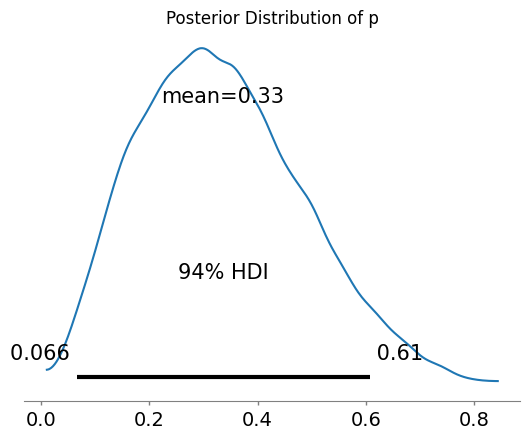

In [3]:
import arviz as az

# Plot posterior distribution
az.plot_posterior(trace, var_names=["p"])
plt.title("Posterior Distribution of p")
plt.show()
